dataset
https://www.kaggle.com/datasets/medharawat/google-stock-price


also use data from yfinance

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("medharawat/google-stock-price")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'google-stock-price' dataset.
Path to dataset files: /kaggle/input/google-stock-price


In [20]:
import os

In [21]:
os.listdir(path)

['Google_Stock_Price_Test.csv', 'Google_Stock_Price_Train.csv']

In [22]:
dataset_train = pd.read_csv(os.path.join(path, 'Google_Stock_Price_Train.csv'))
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [23]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [24]:
test_df = pd.read_csv(os.path.join(path, 'Google_Stock_Price_Test.csv'))


In [25]:
test_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [26]:
test_set = test_df[['Open']].values

In [27]:
dataset_train.shape

(1258, 6)

In [28]:
training_set = dataset_train.iloc[:, 1:2].values

In [29]:
training_set[0:5]

array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04]])

In [30]:
test_set[0:5]

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ]])

In [31]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [32]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [33]:
X_train[0]

array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
       0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
       0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
       0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
       0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
       0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
       0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
       0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
       0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
       0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
       0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
       0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656])

In [34]:
X_train.shape[0]

1198

In [35]:
X_train.shape[1]

60

In [38]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #(samples,timestep,feature)

In [40]:
X_train[0].shape

(60, 1)

In [41]:
# combine last 60 train values + all test values
total_data = np.concatenate((training_set[-60:], test_set), axis=0)
total_data_scaled = sc.transform(total_data)


In [42]:
X_test = []
y_test = []

for i in range(60, len(total_data_scaled)):
    X_test.append(total_data_scaled[i-60:i, 0])
    y_test.append(total_data_scaled[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

# reshape
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [44]:
model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(60, 1)),
    SimpleRNN(50),
    Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 60, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.5269
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0026
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.6036e-04
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.0459e-04
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.2402e-04
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.3228e-04
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 6.5121e-04
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 6.2157e-04
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.1659e-04
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.1946e-04
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 5.6923e-04
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.5512e-04
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.8259e-04
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.8023e-04
Epoch 15/50
38/38 ━━━━━

In [ ]:
y_pred_scaled = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


In [ ]:
y_pred = sc.inverse_transform(y_pred_scaled)
y_test_actual = sc.inverse_transform(y_test.reshape(-1, 1))


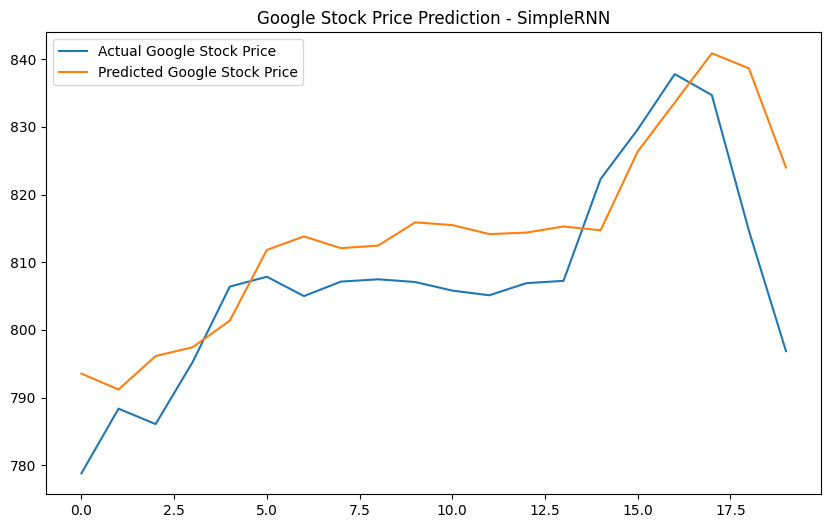

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test_actual, label='Actual Google Stock Price')
plt.plot(y_pred, label='Predicted Google Stock Price')
plt.legend()
plt.title("Google Stock Price Prediction - SimpleRNN")
plt.show()


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_actual, y_pred)
print("R² Score:", r2)


R² Score: 0.4689704178975913


# multiple features

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [10]:
cols = ['Open', 'High', 'Low', 'Close', 'Volume']

for col in cols:
    dataset_train[col] = (
        dataset_train[col]
        .astype(str)
        .str.replace(',', '')
        .astype(float)
    )

    test_df[col] = (
        test_df[col]
        .astype(str)
        .str.replace(',', '')
        .astype(float)
    )


In [11]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   float64
dtypes: float64(5), object(1)
memory usage: 59.1+ KB


In [12]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
training_set = dataset_train[features].values
test_set = test_df[features].values


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

training_set_scaled = scaler.fit_transform(training_set)
test_set_scaled = scaler.transform(test_set)


In [14]:
X_train, y_train = [], []
timesteps = 60
target_col = 0   # predict 'Open'

for i in range(timesteps, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-timesteps:i, :])
    y_train.append(training_set_scaled[i, target_col])

X_train = np.array(X_train)
y_train = np.array(y_train)


In [15]:
model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(60, 5)),
    SimpleRNN(50),
    Dense(1)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.1678
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0022
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0010
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0010
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0010
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.9266e-04
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 7.5355e-04
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 5.5363e-04
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 6.0689e-04
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.3274e-04
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 5.3381e-04
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.6365e-04
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.4035e-04
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.2485e-04
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━

In [ ]:
timesteps = 60
target_col = 0   # 'Open'

# stack last 60 train rows with all test rows (already scaled)
total_scaled = np.concatenate((training_set_scaled[-timesteps:], test_set_scaled), axis=0)

X_test, y_test = [], []

for i in range(timesteps, len(total_scaled)):
    X_test.append(total_scaled[i-timesteps:i, :])   # all 5 features
    y_test.append(total_scaled[i, target_col])      # only 'Open' column

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_test.shape, y_test.shape)  # should be (num_test_samples, 60, 5), (num_test_samples,)


(20, 60, 5) (20,)


In [ ]:
y_pred_scaled = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


In [ ]:
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Test loss (MSE on scaled values):", test_loss)


Test loss (MSE on scaled values): 0.0005040038377046585


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def invert_open_column(scaled_col_1d):
    """Inverse-transform only the 'Open' column using the 5-feature scaler."""
    scaled_col_1d = scaled_col_1d.reshape(-1)          # ensure 1D
    dummy = np.zeros((len(scaled_col_1d), training_set_scaled.shape[1]))
    dummy[:, 0] = scaled_col_1d                        # put values in 'Open' column
    inv = scaler.inverse_transform(dummy)
    return inv[:, 0]                                   # return only 'Open'

# inverse-transform
y_test_inv = invert_open_column(y_test)
y_pred_inv = invert_open_column(y_pred_scaled.squeeze())

# metrics
mse  = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test_inv, y_pred_inv)
r2   = r2_score(y_test_inv, y_pred_inv)

print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


MSE : 145.6426
RMSE: 12.0682
MAE : 10.9491
R²  : 0.3299


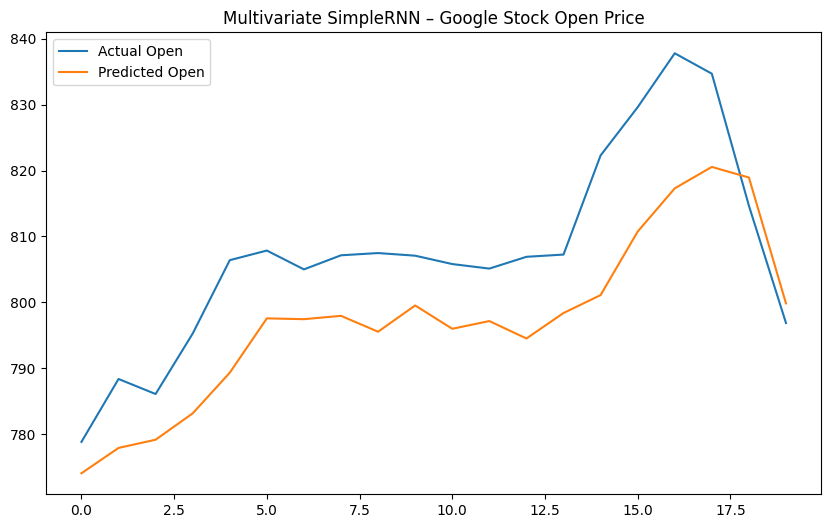

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test_inv, label='Actual Open')
plt.plot(y_pred_inv, label='Predicted Open')
plt.legend()
plt.title("Multivariate SimpleRNN – Google Stock Open Price")
plt.show()
